# Linear Regression 
**`Author : Alhasan Gamal Mahmoud`**

**`Date   : 17 - 02 - 2022`**

**In this Script, I will develop a Python program that is able to implement the gradient descent variants (Stochastic/Mini-Batch) in order to achieve the linear regression of a set of datapoints.**

## Stochastic Gradient Descent (SGD)
The word ‘stochastic‘ means a system or a process that is linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. In typical Gradient Descent optimization, like Batch Gradient Descent, the batch is taken to be the whole dataset. Although using the whole dataset is really useful for getting to the minima in a less noisy and less random manner, the problem arises when our datasets get big. 

suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, and it has to be done for every iteration until the minima are reached. Hence, it becomes computationally very expensive to perform.
This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

The graph below shows how SGD converges to the final solution (exemplary run). The red dot indicates the sample chosen for given step calculations.

<img src="1_rLCX-QeQG6igkX8Zq3sAhw.gif">

**The path took by Batch Gradient Descent**   
<img src='gdp.png'>

**A path has been taken by Stochastic Gradient Descent** 
<img src='sgd-1.jpg'>



In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

In [2]:
# creat random X and y
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

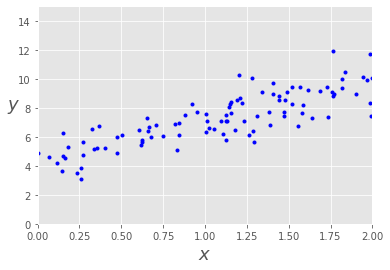

In [3]:
# draw data

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [4]:
# cost function
def ComputeCost(X,y,theta):
    z = np.power(((X * theta.T) - y),2)
    return np.sum(z) / (2 * len(X))

In [5]:
# SGD Function
def SGD(X,y,theta,learning_rate,iterations):
   
    m = len(y)
    cost_history = []
    thatas = []
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            
            cost += ComputeCost(X_i,y_i,theta)
        thatas.append(theta)
        cost_history.append(cost)
        if it>0:
            if np.abs(cost_history[it-1] - cost_history[it]) < 0.0001:
                break
        
    return theta, cost_history,thatas

In [6]:
# perform SGD to fit the model parameters
lr =0.008
n_iter = 1000

theta = np.array([[4],[3]])

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,thetas = SGD(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.201,
Theta1:          2.828
Final cost/MSE:  1694.350


In [7]:
thetas = np.squeeze(np.array(thetas))

In [8]:
# Predict y values using the LR equation [h(x)= theta_0 + theta_1 * x]
f = X_b @ theta

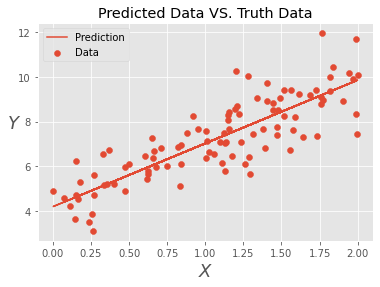

In [9]:
# Plot LR equation output (fitted line) with the original data (scatter plot of X,y)

plt.plot(X_b[:,1],f,label='Prediction')

plt.scatter(X,y,label='Data')

plt.legend()

plt.xlabel("$X$",fontsize=18)

plt.ylabel("$Y$",rotation=0,fontsize=18)

plt.title("Predicted Data VS. Truth Data")

plt.show()

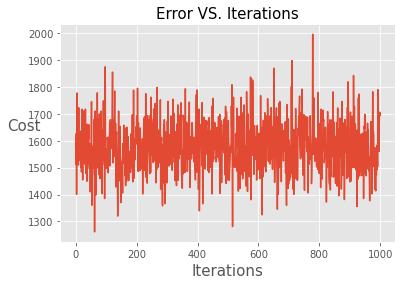

In [10]:
# draw Error Graph
plt.plot(cost_history)
plt.xlabel("Iterations",fontsize=15)
plt.ylabel("Cost",rotation=0,fontsize=15)
plt.title("Error VS. Iterations",fontsize=15)
plt.show()

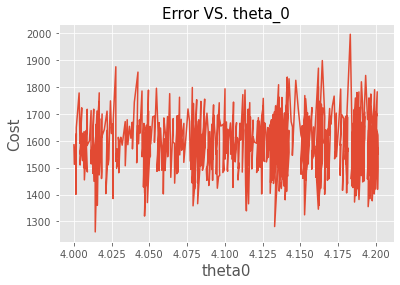

In [11]:
# draw Error and theta0 graph 
plt.plot(thetas[:,0],cost_history)
plt.xlabel("theta0",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_0",fontsize=15)
plt.show()

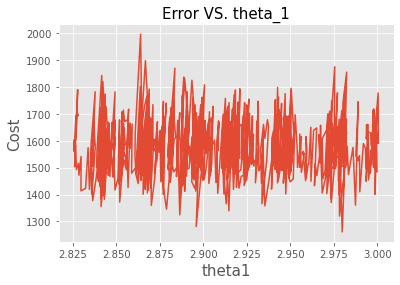

In [12]:
# draw Error and theta1 graph 
plt.plot(thetas[:,1],cost_history)
plt.xlabel("theta1",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_1",fontsize=15)
plt.show()

In [13]:
# use R2 score to evaluate LR equation output
from sklearn.metrics import r2_score

r2_score(y,f)

0.6933757104348695

## Mini-batch Gradient Descent
Mini-batch Gradient Descent is an approach to find a fine balance between pure SGD and Batch Gradient Descent. The idea is to use a subset of observations to update the gradient. The number of points used for each size is called batch size and each iteration over a batch is called an epoch. An animation below shows convergence process with points used at each step (batch size of 10).

<img src="1_l34RbraWYe3Q0K3JLWW2tw.gif">

The trajectory is still noisy but goes more steadily toward the minimum.

<img src="1_CIGGHrHDun-2vjNBahkxvA.png">


In [14]:
# creat random X and y
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

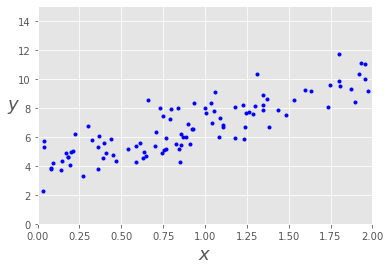

In [15]:
# draw data

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [16]:
# cost function
def ComputeCost(X,y,theta):
    z = np.power(((X * theta.T) - y),2)
    return np.sum(z) / (2 * len(X))

In [17]:
# MGD Function
def MGD(X,y,theta,learning_rate,iterations,batch_size =100):
    
    m = len(y)
    cost_history = []
    thetas = []
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
                       
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += ComputeCost(X_i,y_i,theta)
        cost_history.append(cost)
        thetas.append(theta)
        if it>0:
            if np.abs(cost_history[it-1] - cost_history[it]) < 0.0001:
                break
        
    return theta, cost_history,thetas

In [18]:
# perform MGD to fit the model parameters

lr =0.8
n_iter = 1000

theta = np.array([[4],[3]])

X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history,thetas = MGD(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.865,
Theta1:          3.099
Final cost/MSE:  13.824


In [19]:
thetas = np.squeeze(np.array(thetas))
thetas.shape

(35, 2)

In [20]:
# Predict y values using the LR equation [h(x)= theta_0 + theta_1 * x]
f = X_b @ theta

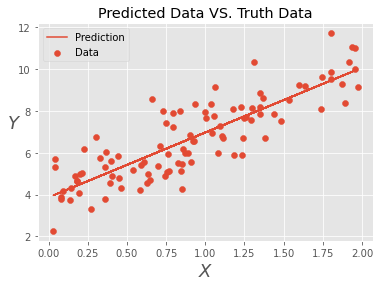

In [21]:
# Plot LR equation output (fitted line) with the original data (scatter plot of X,y)

plt.plot(X_b[:,1],f,label='Prediction')

plt.scatter(X,y,label='Data')

plt.legend()

plt.xlabel("$X$",fontsize=18)

plt.ylabel("$Y$",rotation=0,fontsize=18)

plt.title("Predicted Data VS. Truth Data")

plt.show()

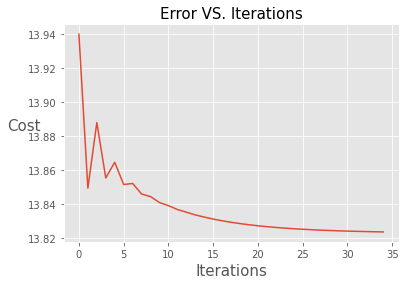

In [26]:
# draw Error Graph
plt.plot(cost_history)
plt.xlabel("Iterations",fontsize=15)
plt.ylabel("Cost",rotation=0,fontsize=15)
plt.title("Error VS. Iterations",fontsize=15)
plt.show()

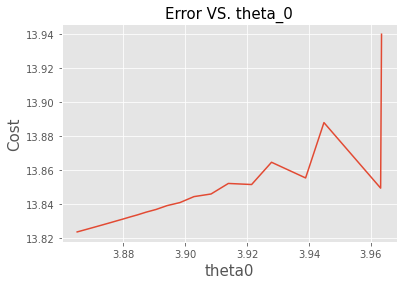

In [23]:
# draw Error and theta0 graph 
plt.plot(thetas[:,0],cost_history)
plt.xlabel("theta0",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_0",fontsize=15)
plt.show()

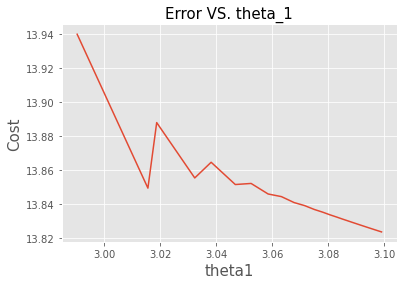

In [24]:
# draw Error and theta1 graph 
plt.plot(thetas[:,1],cost_history)
plt.xlabel("theta1",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_1",fontsize=15)
plt.show()

In [25]:
# use R2 score to evaluate LR equation output
from sklearn.metrics import r2_score

r2_score(y,f)

0.7267263890311036